In [1]:
import os
os.getcwd()

'/Users/maximochterbeck/Library/Mobile Documents/com~apple~CloudDocs/University/FGV/Intro to Python'

1) Baixar dados de Github

In [2]:
import pandas as pd
 
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

df = pd.read_csv("https://raw.githubusercontent.com/drobaina/Python/main/microdados_ed_basica_RJ_2022.csv", header=0)
df.head()


,Unnamed: 0,NU_ANO_CENSO,NO_REGIAO,CO_REGIAO,NO_UF,SG_UF,CO_UF,NO_MUNICIPIO,CO_MUNICIPIO,NO_MESORREGIAO,...,QT_TUR_FUND_AF,QT_TUR_MED,QT_TUR_PROF,QT_TUR_PROF_TEC,QT_TUR_EJA,QT_TUR_EJA_FUND,QT_TUR_EJA_MED,QT_TUR_ESP,QT_TUR_ESP_CC,QT_TUR_ESP_CE
0,0,2022,Sudeste,3,Rio de Janeiro,RJ,33,Angra dos Reis,3300100,Sul Fluminense,...,10.0,20.0,0.0,0.0,8.0,0.0,8.0,21.0,21.0,0.0
1,1,2022,Sudeste,3,Rio de Janeiro,RJ,33,Angra dos Reis,3300100,Sul Fluminense,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0
2,2,2022,Sudeste,3,Rio de Janeiro,RJ,33,Angra dos Reis,3300100,Sul Fluminense,...,0.0,8.0,1.0,1.0,4.0,0.0,4.0,5.0,5.0,0.0
3,3,2022,Sudeste,3,Rio de Janeiro,RJ,33,Angra dos Reis,3300100,Sul Fluminense,...,8.0,32.0,10.0,10.0,0.0,0.0,0.0,27.0,27.0,0.0
4,4,2022,Sudeste,3,Rio de Janeiro,RJ,33,Angra dos Reis,3300100,Sul Fluminense,...,8.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


2) Filtrar cidade: Rio de Janeiro

In [21]:
city_counts = df.groupby('NO_MUNICIPIO').size()
print(city_counts)
df_rdj = df[df['NO_MUNICIPIO'] == 'Rio de Janeiro']



NO_MUNICIPIO
Angra dos Reis        163
Aperibé                25
Araruama              190
Areal                  21
Armação dos Búzios     37
                     ... 
Três Rios              73
Valença               116
Varre-Sai              35
Vassouras              60
Volta Redonda         200
Length: 92, dtype: int64


3) Grouping by Variable:

In [51]:
rooms = df_rdj.groupby('TP_DEPENDENCIA').agg({
    'QT_SALAS_UTILIZADAS': 'mean',
    'QT_SALAS_UTILIZA_CLIMATIZADAS': 'mean'
}).reset_index()
rooms



,TP_DEPENDENCIA,QT_SALAS_UTILIZADAS,QT_SALAS_UTILIZA_CLIMATIZADAS
0,1,36.600000,31.520000
1,2,14.903226,10.374194
2,3,10.684143,8.275575
3,4,11.766010,9.332020


Chart


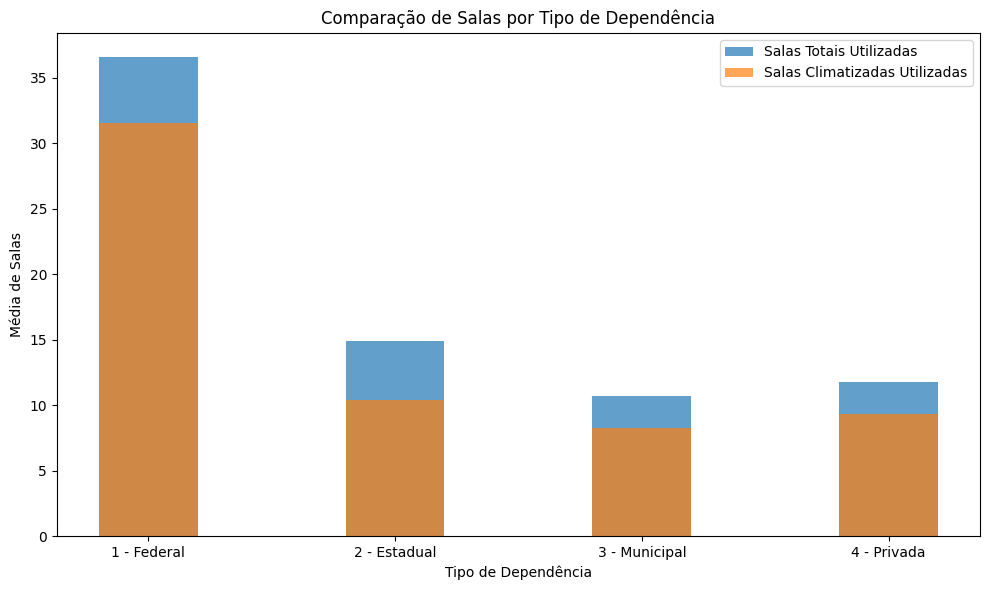

In [61]:
import matplotlib.pyplot as plt

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width
width = 0.4

# X locations
x = rooms['TP_DEPENDENCIA']

# Create overlapping bars
ax.bar(x, rooms['QT_SALAS_UTILIZADAS'], width, label='Salas Totais Utilizadas', alpha=0.7)
ax.bar(x, rooms['QT_SALAS_UTILIZA_CLIMATIZADAS'], width, label='Salas Climatizadas Utilizadas', alpha=0.7)

# Setting labels and title in Portuguese
ax.set_xlabel('Tipo de Dependência')
ax.set_ylabel('Média de Salas')
ax.set_title('Comparação de Salas por Tipo de Dependência')

# Custom x-tick labels
custom_labels = ["1 - Federal", "2 - Estadual", "3 - Municipal", "4 - Privada"]
ax.set_xticks(rooms['TP_DEPENDENCIA'])
ax.set_xticklabels(custom_labels)

ax.legend()

plt.tight_layout()
plt.show()


Observando os valores, percebe-se que as escolas de dependência federal têm, em média, o maior número de salas utilizadas, com 36,6 salas, das quais 31,52 são climatizadas. As escolas estaduais possuem uma média de 14,9 salas utilizadas, com 10,37 delas climatizadas. Já as escolas municipais contam com uma média de 10,68 salas utilizadas, e 8,27 destas são climatizadas. Por último, as escolas privadas têm uma média de 11,76 salas utilizadas, das quais 9,33 são climatizadas. Isso indica que as escolas federais possuem infraestrutura superior em termos de quantidade de salas, enquanto as outras categorias mostram-se mais próximas em valores.

Grouping 2


In [5]:
filtro = df[df['NO_MUNICIPIO'] == 'Rio de Janeiro']

grupo = filtro.groupby(['IN_DESKTOP_ALUNO', 'IN_INTERNET_ALUNOS']).size().reset_index(name='Contagem')

# Função para atribuir categorias
def atribuir_categoria(linha):
    if linha['IN_DESKTOP_ALUNO'] == 0 and linha['IN_INTERNET_ALUNOS'] == 0:
        return 'Nenhum'
    elif linha['IN_DESKTOP_ALUNO'] == 0 and linha['IN_INTERNET_ALUNOS'] == 1:
        return 'Só internet'
    elif linha['IN_DESKTOP_ALUNO'] == 1 and linha['IN_INTERNET_ALUNOS'] == 0:
        return 'Só computador'
    else:
        return 'Ambos'

grupo['Categoria'] = grupo.apply(atribuir_categoria, axis=1)

print(grupo)

   IN_DESKTOP_ALUNO  IN_INTERNET_ALUNOS  Contagem      Categoria
0               0.0                 0.0      1157         Nenhum
1               0.0                 1.0       272    Só internet
2               1.0                 0.0      1177  Só computador
3               1.0                 1.0      1323          Ambos


Graph 2


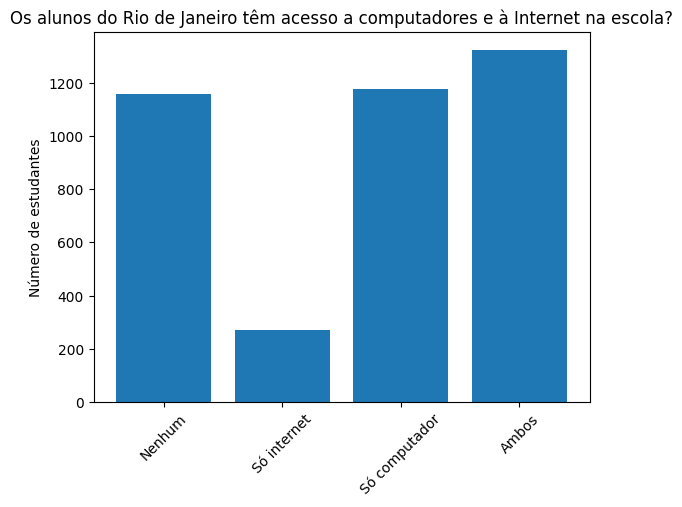

In [8]:
import matplotlib.pyplot as plt 

plt.bar(grupo['Categoria'], grupo['Contagem'])
plt.title("Os alunos do Rio de Janeiro têm acesso a computadores e à Internet na escola?")
plt.ylabel("Número de estudantes")
plt.xticks(rotation=45)
plt.show()

O gráfico mostra a distribuição do acesso à Internet e ao computador, bem como a interseção entre os dois. Ele mostra visualmente o número de alunos que não têm internet ou computador disponível em sua escola, bem como internet e computador disponíveis e todas as opções intermediárias. É interessante notar que a maioria está distribuída de forma bastante homogênea entre nenhum dos dois, somente computador ou ambos, mas somente internet não é tão comum. Isso mostra claramente que as escolas do Rio de Janeiro não estão equipadas com nada ou podem, pelo menos, fornecer aos alunos acesso a computadores. 